In [2]:
import constants
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [3]:
folder_path = "output/data/train/"
folder_names = [s + "_train" for s in constants.class_names]

In [4]:
x = []
y = []

for i in range(len(folder_names)):
    print(folder_names[i])
    print(i)
    for image_name in os.listdir(folder_path + folder_names[i]):
        image = Image.open(folder_path + folder_names[i] + "/" + image_name)
        data = image.getdata()
        arr = np.array(data)
        x.append(arr)
        y.append(i)
        
        

        
    

butterfly_train
0
cow_train
1
elephant_train
2
sheep_train
3
squirrel_train
4


In [5]:
im = x[0]
im = np.array(im).reshape(64, 64, 3)
im.shape

(64, 64, 3)

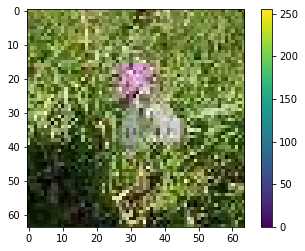

In [6]:
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
images = []
labels = []
for i in range(len(x)):
    try:
        images.append(np.array(x[i]).reshape(64,64,3))
        labels.append(y[i])
    except ValueError:
        pass
        
print(len(images), len(labels))

8163 8163


In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=0)

In [9]:
X_train = [i / 255.0 for i in X_train]
X_test = [i / 255.0 for i in X_test]

print(len(X_train),len(X_test))

5469 2694


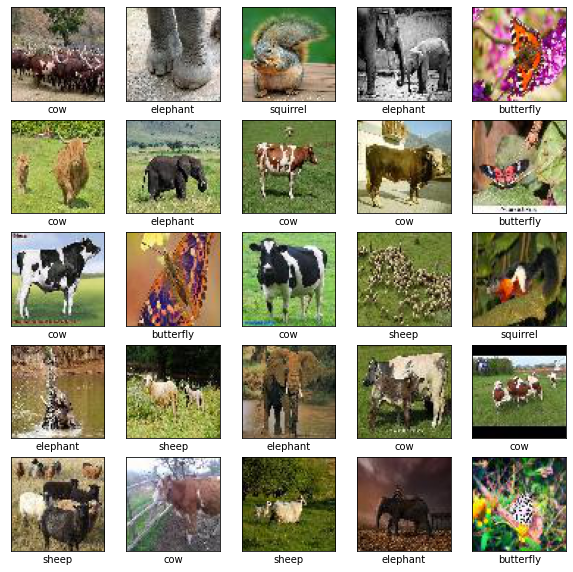

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(constants.class_names[y_train[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(12, 12, 32)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
x_train = np.array(X_train).reshape(5469, 64, 64, 3)

In [13]:
model.fit(x_train, np.array(y_train), epochs=5)

Epoch 1/5
171/171 [==============================] - 29s 163ms/step - loss: 1.4281 - accuracy: 0.4118
Epoch 2/5
171/171 [==============================] - 26s 153ms/step - loss: 0.8745 - accuracy: 0.6692
Epoch 3/5
171/171 [==============================] - 25s 149ms/step - loss: 0.5959 - accuracy: 0.7884
Epoch 4/5
171/171 [==============================] - 26s 150ms/step - loss: 0.3602 - accuracy: 0.8789
Epoch 5/5
171/171 [==============================] - 26s 153ms/step - loss: 0.1547 - accuracy: 0.9565


In [14]:
x_test = np.array(X_test).reshape(len(X_test), 64, 64, 3)

In [15]:
test_loss, test_acc = model.evaluate(x_test,  np.array(y_test), verbose=2)

print('\nTest accuracy:', test_acc)

85/85 - 3s - loss: 1.2905 - accuracy: 0.6496

Test accuracy: 0.6495916843414307


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(x_test)

In [18]:
print(np.argmax(predictions[0]), y_test[0])

0 0


In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(constants.class_names[predicted_label],
                                100*np.max(predictions_array),
                                constants.class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


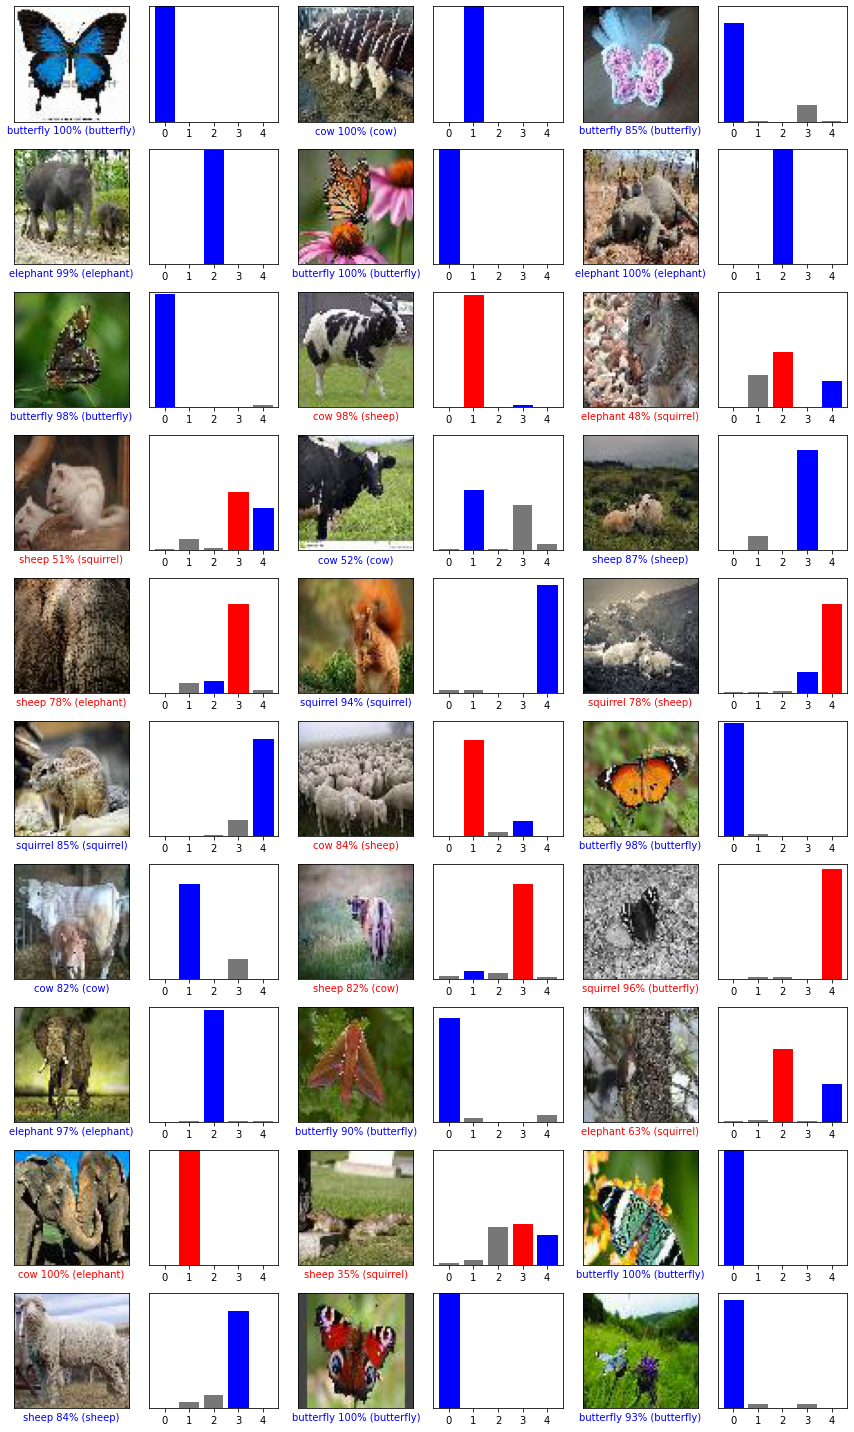

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()